# IBM Watson Marketing Auto Insurance Customer Value Analysis
Written by James Cross ([github](https://github.com/jcrossyale))

### 1. [Project Overview](#section1)

### 2. [Getting Settled](#section2)

### 3. [Data Cleaning](#section3)

### 4. [Data Exploration](#section4)
    4.1 Descriptive Statistics
    4.2 Visualization

### 5. [Predicting Customer Lifetime Value](#section5)
    5.1 Linear Regression 
    5.2 Random Forest
    5.3 Gradient Boosting
    5.4 XGBoost for Regression
    
### 6. [Predicting Marketing Call Response](#section6)
    6.1 Support Vector Machine (SVM/SVC)
    6.2 XGBoost for Classification

### 7. [Unsupervised Customer Segmentation](#section7)
    7.1 KMeans
    7.2 KPrototypes
    
### 8. [Conclusion](#section8)

<a id='section1'></a>

# 1. Project Overview

This project utilizes a public dataset provided by IBM Watson Analytics ([here](https://www.kaggle.com/pankajjsh06/ibm-watson-marketing-customer-value-data)) containing auto insurance policy data for 9000+ customers.

### Objective 1: Predicting Customer Lifetime Value (CLV)
Our primary objective is to predict Customer Lifetime Value (or CLV) using both continuous and categorical features in the dataset, taking advantage of various Regression techniques of increasing complexity, namely **Linear Regression (OLS), Random Forest, Gradient Boosting, and XGBoost.** 

### Objective 2: Classifying Response to Marketing Calls
Our second objective is to predict whether a given customers will respond to a marketing call, a classification task. We'll compare the performance of two different models: **Support Vector Machine (SVM/SVC) and XGBoost.** 

### Objective 3: Unsupervised Customer Segmentation
Traditional customer segmentation methods, such as RFM analysis, often require human expertise and are limited in their robustness. In our third objective, we'll partition our customers into distinct, analytically meaningful groups, using two unsupervised clustering algorithms: **KMeans and KPrototypes**.


<a id='section2'></a>

# 2. Getting Settled

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

import xgboost as xgb

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelBinarizer, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, balanced_accuracy_score

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering

from kmodes.kprototypes import KPrototypes

In [2]:
df = pd.read_csv("./data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

In [3]:
# Shape of data
print("Shape of data: ", df.shape)

# Features
print("\nColumns: ", list(df.columns))

Shape of data:  (9134, 24)

Columns:  ['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus', 'Gender', 'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size']


In [4]:
# First 5 rows
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
# Data Types
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

<a id='section3'></a>

# 3. Data Cleaning

Next, we'll check for missing values and do some data cleaning.

In [6]:
# Checking for missing values
df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

It looks like this data has been pre-processed to address missing data. Nevertheless, It's worth considering how the data might've been cleaned, which could've involved directly removing Null-value rows, imputing the data, or some other method.

Let's conduct a few more cleaning steps:

In [7]:
# Remove Customer column (irrelevant for analyses)
df = df.drop(columns=['Customer'])

# Rename columns, remove spaces
df.columns = df.columns.str.replace(' ', '') 
df = df.rename(columns={'MonthlyPremiumAuto': 'MonthlyPremium',
                        'NumberofOpenComplaints': 'NumOpenComplaints',
                        'NumberofPolicies': 'NumPolicies',
                        'EmploymentStatus': 'Employment'})

# Remove 'Auto' from PolicyType
df['PolicyType'] = df['PolicyType'].str.split(' ').map(lambda x: x[0])

# Remove Policy type (e.g. Corporate) from "Policy" variable, add to new column PolicyLevel
df['PolicyLevel'] = df['Policy'].str.split(' ').map(lambda y: y[1])
df = df.drop(columns=['Policy'])

# Convert Income and MonthlyPremiumAuto to float64 dtype
df[['Income', 'MonthlyPremium']] = df[['Income', 'MonthlyPremium']].astype('float64')

# Remove spaces from VehicleClass column
df['VehicleClass'] = df['VehicleClass'].str.replace(' ','')

# Value recoding in certain columns
df = df.replace(to_replace={'Gender': {'M': 'Male', 'F': 'Female'},
                            'SalesChannel': {'Call Center': 'CallCenter'}
                           })

We'll continue to clean our data as we start to explore and visualize our data.

<a id='section4'></a>

# 4. Data Exploration

## 4.1 Descriptive Statistics

In [8]:
# basic descriptive statistics of numerical columns
df.describe()

,CustomerLifetimeValue,Income,MonthlyPremium,MonthsSinceLastClaim,MonthsSincePolicyInception,NumOpenComplaints,NumPolicies,TotalClaimAmount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


<AxesSubplot:>

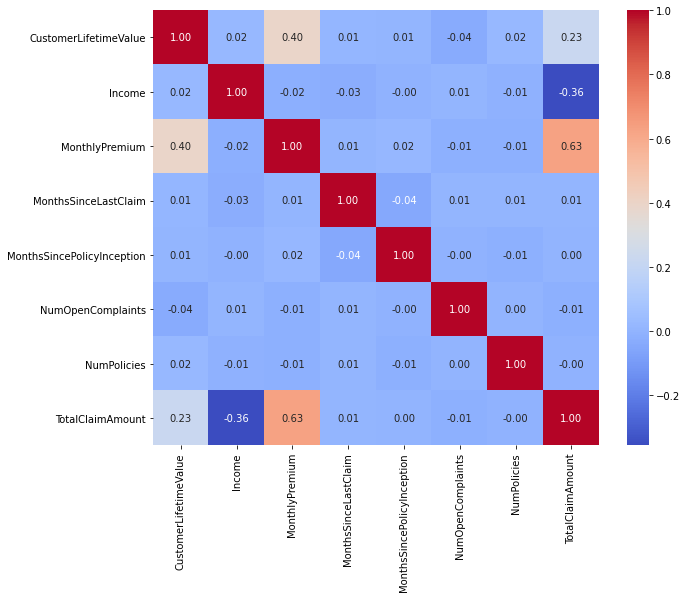

In [9]:
# Correlation Matrix for continuous variables
corr = df.corr()
colormap = sns.diverging_palette(200, 10, as_cmap=True)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")

There are a few interesting correlations observed, including a moderately-strong correlation between Total $ in Insurance Claims (TotalClaimAmount) and Monthly Auto Payments for Premium services (MonthlyPremiumAuto). Customer Lifetime Value (CLV) is also moderately correlated with MonthlyPremiumAuto and weakly correlated with TotalClaimAmount. We'll visually examine some of these relationships below.

## 4.2 Visualization

### Barplots (Policy Information)


Text(0.5, 1.0, 'Number of Customers by Vehicle Class and Vehicle Size')

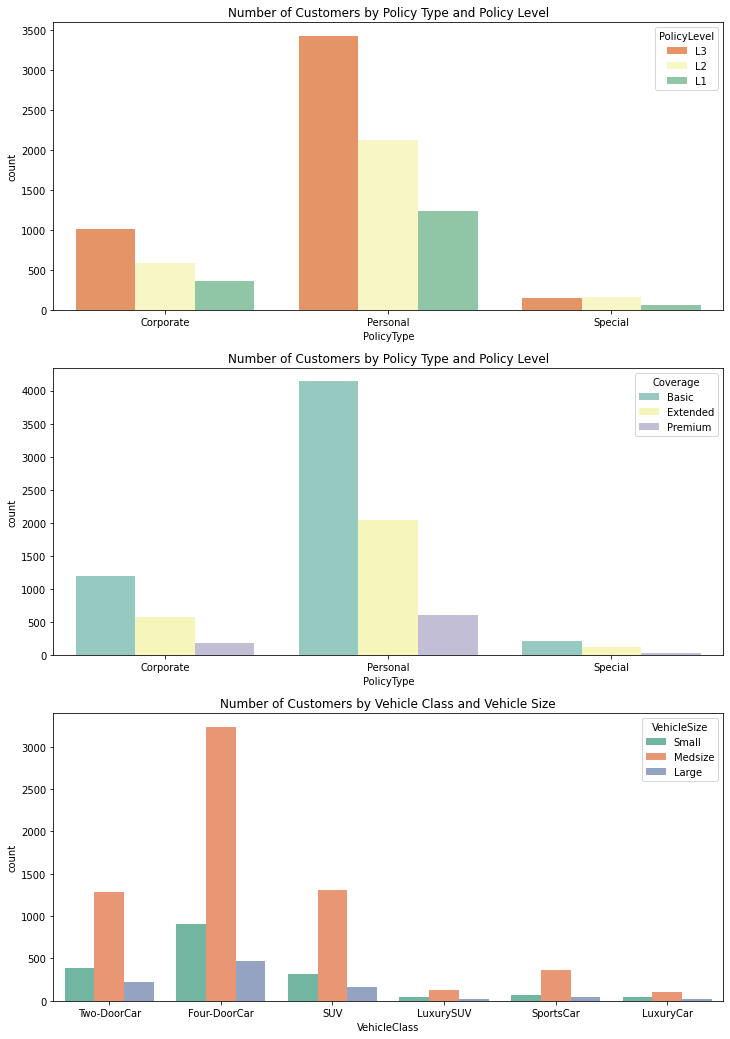

In [10]:
fig, axs = plt.subplots(3,1,figsize = (12,18))

# Customers by PolicyType and PolicyLevel
sns.countplot(x='PolicyType', hue='PolicyLevel', data=df, ax = axs[0], palette = 'Spectral')
axs[0].set_title("Number of Customers by Policy Type and Policy Level")

# Customers by PolicyType and Coverage
sns.countplot(x='PolicyType', hue='Coverage', data=df, ax = axs[1], palette = 'Set3')
axs[1].set_title("Number of Customers by Policy Type and Policy Level")

# Customers by Vehicle Class and Vehicle Size
sns.countplot(x='VehicleClass', hue='VehicleSize', hue_order=['Small','Medsize','Large'], data=df,
              ax = axs[2], palette = 'Set2')
axs[2].set_title("Number of Customers by Vehicle Class and Vehicle Size")

### Histograms

Text(0.5, 1.0, 'Histogram of Customer Lifetime Value (CLV)')

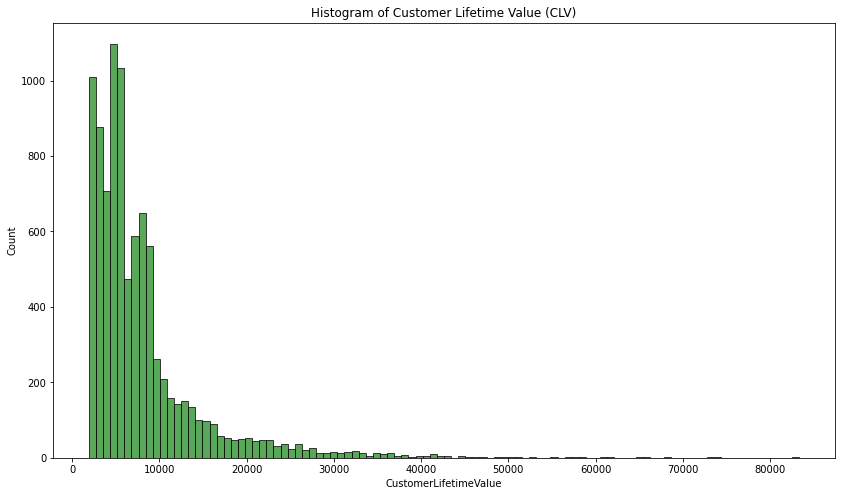

In [11]:
fig, ax = plt.subplots(figsize = (14,8))
sns.histplot(df['CustomerLifetimeValue'], color = 'forestgreen', bins = 100, ax = ax)
ax.set_title("Histogram of Customer Lifetime Value (CLV)")

The distribution `CustomerLifetimeValue` is heavily right-skewed (the majority of customers have relatively low CLV). We might expect other variables (such as `Income`) to also be skewed, so let's look at the distribution for all continuous variables:

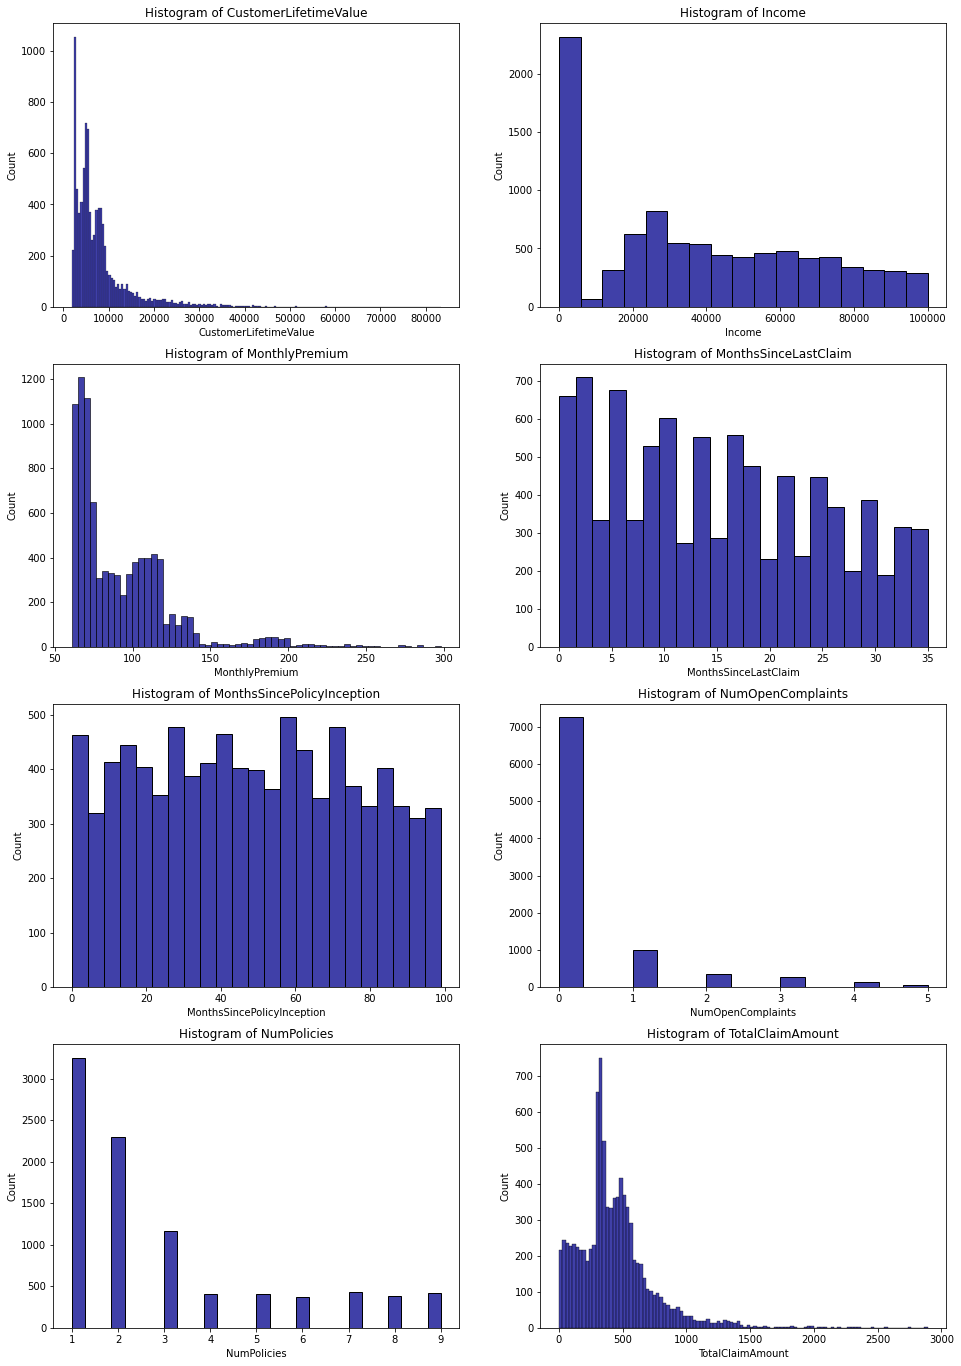

In [12]:
# get non-CLV numeric column names 
numeric_columns = df.select_dtypes([np.number]).columns

# plot histograms of numeric columns
fig, axs = plt.subplots(int(len(numeric_columns)/2), 2, figsize = (16,24))

for i,col in enumerate(numeric_columns):
    r,c = i//2, i%2
    sns.histplot(df[col], ax = axs[r,c], color = 'darkblue')
    axs[r,c].set_title("Histogram of %s" % col)

**Based on the skewed nature of certain variables in the data, we'll conduct a log transform on `CustomerLifetimeValue`, `Income`, `MonthlyPremium`, and `TotalClaimAmount`.**
**We will apply the transformation `log(column + 1)` to account for zero values, lest we plague our dataframe with `-inf` values!** `logCLV` will become the predicted variable in Objective 1, which will help us improve our model performance. 

In [13]:
#Create log-transformed columns
df['logCLV'] = np.log(df['CustomerLifetimeValue'] + 1)
df['logIncome'] = np.log(df['Income'] + 1)
df['logMonthlyPremium'] = np.log(df['MonthlyPremium'] + 1)
df['logTotalClaimAmount'] = np.log(df['TotalClaimAmount'] + 1)

### logCLV Boxplots by Demographic Variables

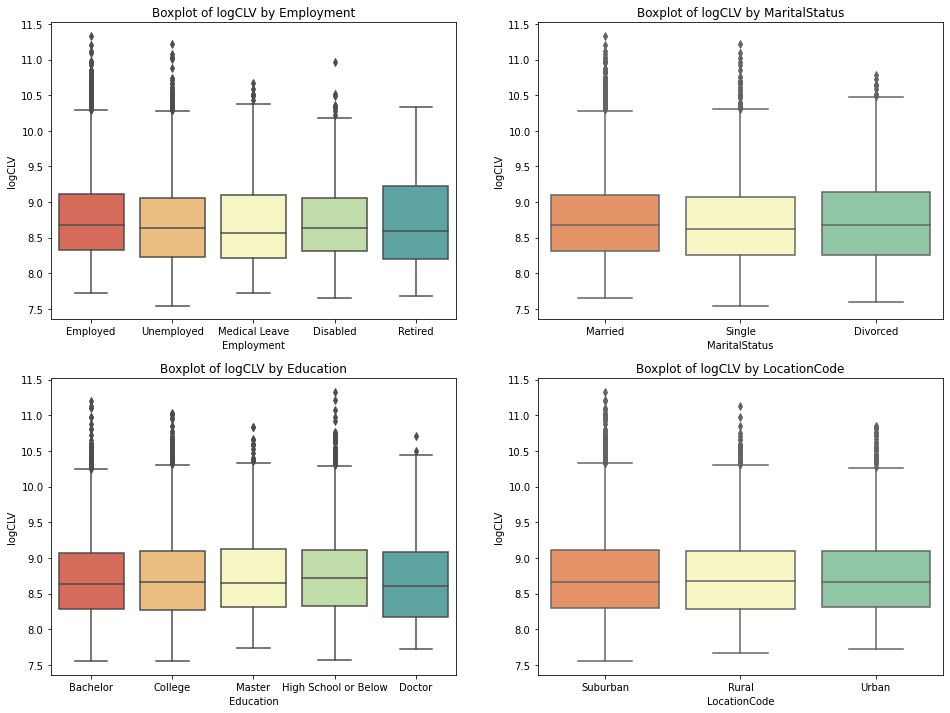

In [14]:
fig, axs = plt.subplots(2,2, figsize = (16,12))
demo_columns = ['Employment', 'MaritalStatus', 'Education','LocationCode']

for i,col in enumerate(demo_columns):
    r, c = i//2, i%2
    sns.boxplot(x=col, y='logCLV', data=df, ax = axs[r,c], palette = 'Spectral')
    axs[r,c].set_title("Boxplot of logCLV by %s" % col)

`logCLV` values appear to have similar distributions across different demographic categories, so let's take a look at the variables related to auto policy instead.

### logCLV Boxplots by Policy Information Variables

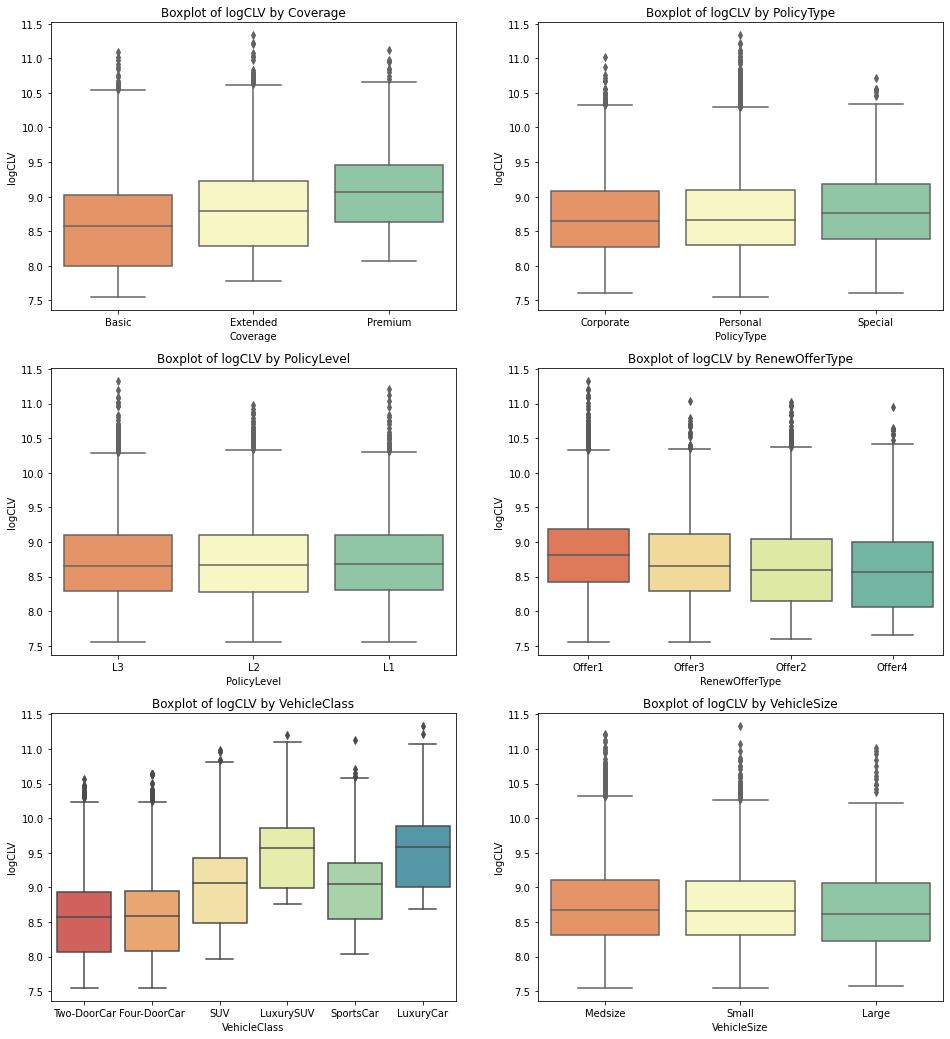

In [15]:
policy_columns = ['Coverage','PolicyType','PolicyLevel','RenewOfferType','VehicleClass','VehicleSize']

fig, axs = plt.subplots(3,2, figsize = (16,18))

for i,col in enumerate(policy_columns):
    r, c = i//2, i%2
    sns.boxplot(x=col, y='logCLV', data=df, ax = axs[r,c], palette = 'Spectral')
    axs[r,c].set_title("Boxplot of logCLV by %s" % col)

Although we don't observe very many differences in `logCLV` along demographic categories, we do see some potential differences in `logCLV` between `Coverage` and `VehicleTypes` (which makes sense intuitively). Whether these differences are significant or not could be determined using ANOVA or other statistical techniques, but for now, let's focus on the (exciting!) machine learning objectives at hand.

<a id='section5'></a>

# 5. Predicting Customer Lifetime Value

As described above, our first goal is to predict Customer Lifetime Value using four different algorithms provided by Scikit-learn. More precisely, our response variable will be the transformed `logCLV` variable (created above), which accounts for the right-skewedness of CLV values and should yield better model accuracy and robustness. For our analysis, we'll utilize scikit-learn's `GridSearchCV` to conduct hyperparameter optimization. Root Mean Square Error (RMSE) and the Coefficient of Determination (R2) are two solid choices for model evaluation, so we'll use these metrics for model evaluation.

### Setup data

In [16]:
# Drop original versions of log-transformed columns
df_reg = df.drop(columns=['CustomerLifetimeValue','Income','MonthlyPremium','TotalClaimAmount'])

# Binarize Response Variable
df_reg = df_reg.replace(to_replace={'Response': {'No': 0, 'Yes': 1}})

# One-hot encoding of other categorical variables
df_reg = pd.get_dummies(df_reg)
print("New shape of data: ", df_reg.shape)

# Create our predictor and response variables
X = df_reg.drop(columns=['logCLV']).copy()
y = df_reg['logCLV'].copy()

# Split the data into training and test sets (80/20)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 111)

New shape of data:  (9134, 117)


In [17]:
# Quick description of prediction variable logCLV
y.describe()

count    9134.000000
mean        8.748753
std         0.652816
min         7.549087
25%         8.292862
50%         8.662363
75%         9.100879
max        11.330520
Name: logCLV, dtype: float64

### Linear Regression (Ordinary Least Squares)

In [18]:
# Create and fit Linear Regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Make predictions
y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

# Evaluate model performance
print('Train RMSE: %.4f' % mean_squared_error(y_train, y_pred_train, squared=False))
print('Train R2: %.4f' % r2_score(y_train, y_pred_train))
print('Test RMSE: %.4f' % mean_squared_error(y_test, y_pred_test, squared=False))
print('Test R2: %.4f' % r2_score(y_test, y_pred_test))

Train RMSE: 0.5556
Train R2: 0.2782
Test RMSE: 0.5574
Test R2: 0.2597


### Random Forest

In [19]:
# Create and fit Random Forest model
rfreg = RandomForestRegressor(n_estimators = 100, n_jobs=-1, max_depth = 8, random_state = 111)
rfreg.fit(X_train, y_train)

# Make predictions
y_pred_train = rfreg.predict(X_train)
y_pred_test = rfreg.predict(X_test)

# Evaluate model performance
print('Train RMSE: %.4f' % mean_squared_error(y_train, y_pred_train, squared=False))
print('Train R2: %.4f' % r2_score(y_train, y_pred_train))
print('Test RMSE: %.4f' % mean_squared_error(y_test, y_pred_test, squared=False))
print('Test R2: %.4f' % r2_score(y_test, y_pred_test))

Train RMSE: 0.1756
Train R2: 0.9279
Test RMSE: 0.2020
Test R2: 0.9027


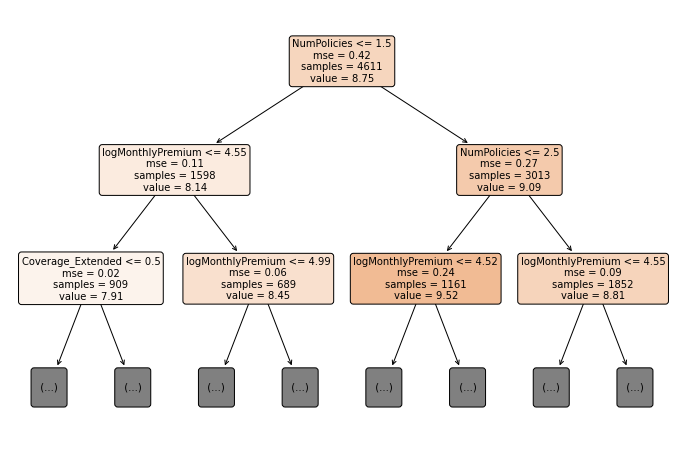

In [20]:
# Example visualization of tree in Random Forest
from sklearn.tree import plot_tree

tree = rfreg.estimators_[0]

fig, _ = plt.subplots(figsize = (12,8))
ax = plot_tree(tree, feature_names = X.columns, rounded = True, max_depth = 2,
          proportion = False, precision = 2, filled = True, fontsize = 10)

### Gradient Boosting

In [21]:
# Create and fit Gradient Boosting model
gbreg = GradientBoostingRegressor(n_estimators = 100,
                                  loss = 'ls',
                                  learning_rate = 0.05,
                                  random_state = 111,
                                  max_depth = 5)
gbreg.fit(X_train, y_train)

# Make predictions
y_pred_train = gbreg.predict(X_train)
y_pred_test = gbreg.predict(X_test)

# Evaluate model performance
print('Train RMSE: %.4f' % mean_squared_error(y_train, y_pred_train, squared=False))
print('Train R2: %.4f' % r2_score(y_train, y_pred_train))
print('Test RMSE: %.4f' % mean_squared_error(y_test, y_pred_test, squared=False))
print('Test R2: %.4f' % r2_score(y_test, y_pred_test))

Train RMSE: 0.1822
Train R2: 0.9224
Test RMSE: 0.2022
Test R2: 0.9026


### XGBoost Regression
* For XGBoost, we'll utilize scikit-learn's `GridSearchCV` to conduct hyperparameter optimization. The best parameters were fit with `full_param_grid`, but for computatation time, the best parameters are inserted directly below. 


In [135]:
# Defining parameter combos

# param_grid = {
#     'n_estimators': [100,200,500,1000],                                                                   
#     'learning_rate': [0.01,0.05,0.1],
#     'max_depth': [3,5,8,12],
#     'gamma': [0,0.1,1],       
#     'reg_lambda': [0,1,3,10],    
# }

best_param_grid = {
    'n_estimators': [200],                                                                   
    'learning_rate': [0.05],
    'max_depth': [8],
    'gamma': [0.1],       
    'reg_lambda': [1],
}

# XGBoost Regression estimator
xgbreg = xgb.XGBRegressor(objective='reg:squarederror',
                          subsample = 0.9,
                          random_state = 111)

# Define grid search
xgbreg_gridsearch = GridSearchCV(estimator=xgbreg,
                                 param_grid=best_param_grid,
                                 scoring='neg_root_mean_squared_error',
                                 verbose=0,
                                 n_jobs=-1,
                                 cv=10)

# Try parameter combos w/ Cross Validation, determine the best with RMSE
xgbreg_gridsearch.fit(X_train,
                      y_train, 
                      eval_set=[(X_train, y_train),(X_test, y_test)],
                      verbose=False,
                      early_stopping_rounds=25)

GridSearchCV(cv=10, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:squarederror',
                                    random_state=111, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=0.9, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'gamma': [0.1], 'learning_rate': [0.05],
                         'max_depth': [8], 'n_estimators'

In [136]:
# Investigate + evaluate best model
best_params = xgbreg_gridsearch.best_params_
best_model = xgbreg_gridsearch.best_estimator_

print("Best parameters from GridSearchCV:\n ", best_params)
print("\nBest model: \n" , best_model)

# Evaluate model performance
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

print('\nTrain RMSE: %.4f' % mean_squared_error(y_train, y_pred_train, squared=False))
print('Train R2: %.4f' % r2_score(y_train, y_pred_train))
print('Test RMSE: %.4f' % mean_squared_error(y_test, y_pred_test, squared=False))
print('Test R2: %.4f' % r2_score(y_test, y_pred_test))


Best parameters from GridSearchCV:
  {'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 200, 'reg_lambda': 1}

Best model: 
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.1,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=111, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.9, verbosity=1)

Train RMSE: 0.1405
Train R2: 0.9538
Test RMSE: 0.1997
Test R2: 0.9050


### Discussion

Among our four models, Traditional Linear Regression performed the worst, while Random Forest, Gradient Boosting and the (optimized) XGBoost regressor performed similarly well (evaluated using Test RMSE and R2). Given that RMSE has the same units as our prediction variable, we can compare the relative magnitude of RMSE to the range of values in `logCLV`. Since `logCLV` ranges from ~7 to 12, the XGBoost Test RMSE value is quite small (and thus quite good)! With similar hyperparameter tuning as executed with XGBoost, Random Forest and Gradient Boosting would likely achieve better RMSE and R2 values, although based on other projects seen in ML literature, they may have still been bested by XGBoost.

In practice, this model has numerous use cases. Most straightforwardly, the auto insurance company could utilize this model to generate expectations of CLV for new customers. For existing customers, these results would likely be informative for things like marketing budget allocation, customer retention initiatives, and much more!

<a id='section6'></a>

# 6. Predicting Marketing Call Response 

Now, we'll train two different models (SVM and XGBoost) to predict whether a given customer will respond to a marketing call (represented by the `Response` Variable). For our purposes, the Negative (Majority) outcome is when the customer does not respond, where `Response = 0`, while the Positive (Minority) outcome is when the customer does respond, assigned a value of `1`.

As we observe below, the `Response` Variable is imbalanced, with most customers *not* responding to our calls. We'll account for this in a few different ways: 1) choosing a robust, meaningful evaluation metric (*F1 Score*), 2) Using *Stratified* KFold Cross Validation, and 3) allowing the use of class-weighting parameters (`class_weight` in SVC, `scale_pos_weight` in XGBoost). We will again perform hyperparameter tuning with Scikit-learn's GridSearchCV, this time applied to both of our models.


Text(0.5, 1.0, 'Countplot of Response Variable')

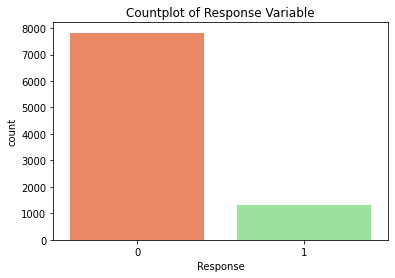

In [137]:
# Response countplot
sns.countplot(x='Response', data=df_reg, palette = ['coral','lightgreen'])
plt.title("Countplot of Response Variable")

In [138]:
# Standardize our numerical variables (excluding Response)
scaler = StandardScaler()
numeric_columns = df_reg.select_dtypes([np.int64,np.float64]).columns[1:]

# Create new dataframe with standardized numerical variable columns (already one-hot encoded)
df_clf = df_reg.drop(columns=numeric_columns).copy()
df_clf.loc[:,numeric_columns] = StandardScaler().fit_transform(df_reg[numeric_columns])

#Ensure our standardization worked (mean 0 and std 1 for all columns)
round(df_clf[numeric_columns].describe(),2)

,MonthsSinceLastClaim,MonthsSincePolicyInception,NumOpenComplaints,NumPolicies,logCLV,logIncome,logMonthlyPremium,logTotalClaimAmount
count,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00
mean,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.50,-1.72,-0.42,-0.82,-1.84,-1.71,-1.20,-6.36
25%,-0.90,-0.86,-0.42,-0.82,-0.70,-1.71,-0.85,-0.21
50%,-0.11,-0.00,-0.42,-0.40,-0.13,0.52,-0.21,0.17
75%,0.78,0.82,-0.42,0.43,0.54,0.65,0.68,0.57
max,1.98,1.83,5.07,2.52,3.96,0.76,3.96,2.42


In [139]:
# Create X and y variables
X = df_clf.drop(columns=['Response']).copy()
y = df_clf['Response']

# Shuffle and Split the data into training and test sets (80/20) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 111)

### Support Vector Machine

In [140]:
svm = SVC()

# defining parameter range 
# param_grid = {
#     'C': [0.1, 1, 10, 100, 1000],  
#     'gamma': [0.001, 0.01, 0.1, 1, 10], 
#     'kernel': ['rbf','linear'],
#     'class_weight': [None, 'balanced']
# }  

best_param_grid={
    'C': [10],  
    'gamma': [0.1], 
    'kernel': ['rbf'],
    'class_weight': [None]
}

# grid search
svm_gridsearch = GridSearchCV(svm,
                    best_param_grid,
                    verbose = 0,
                    n_jobs = -1,
                    scoring='f1',
                    cv = 5) 
  
# fitting the grid search to train data 
svm_gridsearch.fit(X_train, y_train) 


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   50.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'class_weight': [None, 'balanced'],
                         'gamma': [0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=2)

In [141]:
# Investigate + evaluate best model
best_params = svm_gridsearch.best_params_
best_model = svm_gridsearch.best_estimator_

print("Best parameters from GridSearchCV:\n ", best_params)
print("\nBest model: \n" , best_model)

Best parameters from GridSearchCV:
  {'C': 10, 'class_weight': None, 'gamma': 0.1, 'kernel': 'rbf'}

Best model: 
 SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


Accuracy score: 0.9896004378762999
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1570
           1       0.98      0.94      0.96       257

    accuracy                           0.99      1827
   macro avg       0.99      0.97      0.98      1827
weighted avg       0.99      0.99      0.99      1827



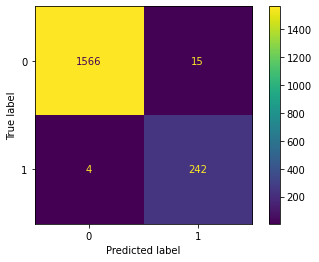

In [142]:
# Generate predictions
y_pred_test = best_model.predict(X_test)

# Accuracy
print('Accuracy score:', accuracy_score(y_pred_test, y_test))

# Classification Report
print(classification_report(y_pred_test, y_test))

# Confusion Matrix
plot_confusion_matrix(best_model,
                      X_test, 
                      y_test,
                      values_format='d')

### XGBoost
* Note: XGBoost recommends setting `scale_pos_weight = sum(negative instances) / sum(positive instances)`, which in our case is equal to ~6, so we'll select values around this range.

In [143]:
# Suggested value for scale_pos_weight
print("Suggested scale_pos_weight: ", str(round(sum(y == 0) / sum(y == 1),3)))

Suggested scale_pos_weight:  5.983


In [145]:
# Defining parameter combos
# param_grid = {
#     'n_estimators': [50, 100, 200, 500],                                                                   
#     'learning_rate': [0.03, 0.05, 0.1],
#     'max_depth': [3,5,10],
#     'gamma': [0, 0.1, 0.2],       
#     'reg_lambda': [0, 1], 
#     'scale_pos_weight': [5,6,7]
# }

best_param_grid = {
    'n_estimators': [200, 500],                                                                   
    'learning_rate': [0.03, 0.05, 0.1],
    'max_depth': [3,5,10],
    'gamma': [0, 0.1, 0.2],       
    'reg_lambda': [0, 1], 
    'scale_pos_weight': [5]
}

# XGBoost Regression estimator
xgbclf = xgb.XGBClassifier(objective='binary:logistic',
                          subsample = 0.8,
                          random_state = 111)

kf = StratifiedKFold(n_splits=10, shuffle = True)

# Define grid search
xgbclf_gridsearch = GridSearchCV(estimator=xgbclf,
                                 param_grid=best_param_grid,
                                 scoring='f1',
                                 verbose=0,
                                 n_jobs=-1,
                                 cv=5)

# Try all parameter combos w/ Cross Validation, determine the best with RMSE
xgbclf_gridsearch.fit(X_train,
                      y_train, 
                      eval_set=[(X_train, y_train), (X_test, y_test)],
                      verbose=False,
                      early_stopping_rounds=10)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=111, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=0.8,
                                     verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.03, 0.05, 0.1],
                         'ma

In [146]:
# Investigate + evaluate best model
best_params = xgbclf_gridsearch.best_params_
best_model = xgbclf_gridsearch.best_estimator_

print("Best parameters from Grid Search:\n ", best_params)
print("\nBest model: \n" , best_model)

Best parameters from Grid Search:
  {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'reg_lambda': 1, 'scale_pos_weight': 5}

Best model: 
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=111,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, seed=None,
              silent=None, subsample=0.8, verbosity=1)


Accuracy score: 0.9912424740010947
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1565
           1       1.00      0.94      0.97       262

    accuracy                           0.99      1827
   macro avg       0.99      0.97      0.98      1827
weighted avg       0.99      0.99      0.99      1827



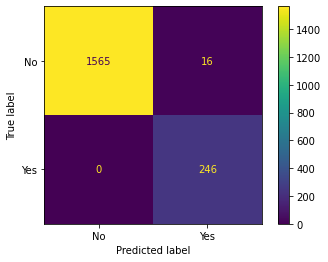

In [147]:
# Generate predictions
y_pred_test = best_model.predict(X_test)

# Accuracy
print('Accuracy score:', accuracy_score(y_pred_test, y_test))

# Classification Report
print(classification_report(y_pred_test, y_test))

# Confusion Matrix
plot_confusion_matrix(best_model,
                      X_test, 
                      y_test, 
                      display_labels=['No','Yes'],
                      values_format='d')

### Summary

We see that both SVM and XGBoost yield results with high Accuracy, Precision, Recall, and F1 Scores. Nice!

We now have two accurate, robust models to predict whether a given customer will respond to a marketing call, which can be used to inform data-drive marketing initiatives like budget allocation, offer targeting, and much more. 

<a id='section7'></a>

# 7. Customer Segmentation

Now, we'll switch to an unsupervised approach—Clustering—to segment our customers into distinct categories. We'll run both KMeans and KPrototype on the data. For visualization, dimensionality reduction via Scikit-learn's `PCA` will allow us to plot our data in 2 dimensions.

### 7.1 KMeans

Since KMeans relies on euclidean distance, feeding categorical variables into the estimator could be problematic, so we'll examine only the numerical variables for now.

In [148]:
minmax_scaler = MinMaxScaler()

# Generate transformed numerical data to use for clustering
scaled_data = minmax_scaler.fit_transform(df_reg[numeric_columns])

Text(0.5, 1.0, 'Within Cluster Sum of Squares (WCSS) vs. Cluster number')

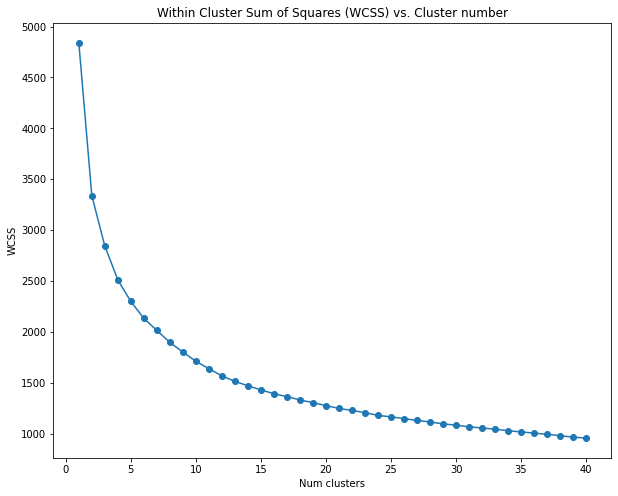

In [149]:
# Generate Elbow Plot
wcss = []

for i in range(1,41):
    kmeans = KMeans(n_clusters=i, 
                    n_init = 20,
                    max_iter =300,
                    random_state = 111)
    
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize = (10,8))

ax.plot(range(1,41), wcss, marker = 'o')
ax.set_xlabel("Num clusters")
ax.set_ylabel("WCSS")
ax.set_title("Within Cluster Sum of Squares (WCSS) vs. Cluster number")

Based on the elbow method, we'll choose a cluster number of 7 for our visualization.

Text(0.5, 1.0, 'Clusters for KMeans with n=7 clusters')

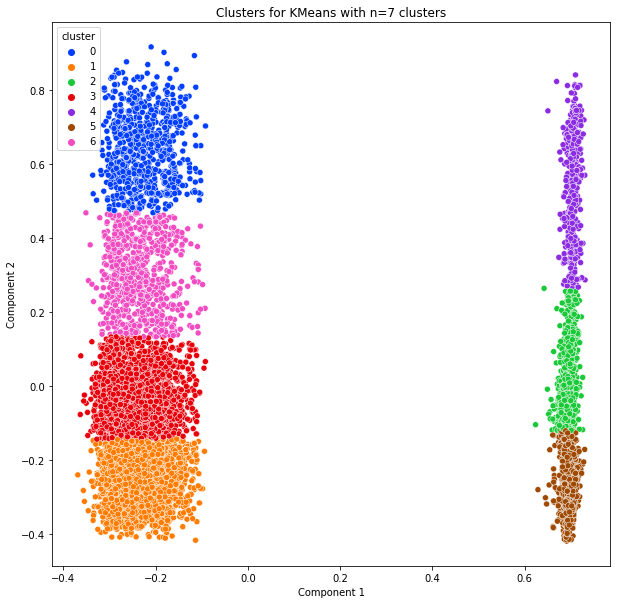

In [150]:
# Visualize clusters in 2 dimensions

pca = PCA(n_components = 2)
pca_data = pca.fit_transform(scaled_data)

kmeans = KMeans(n_clusters=7,
                n_init = 20,
                max_iter =300,
                random_state = 111)
    
kmeans.fit(pca_data)

components_df = pd.DataFrame(pca_data, columns = ['Component 1', 'Component 2'])

components_df['cluster'] = kmeans.labels_

fig, ax = plt.subplots(figsize = (10,10))

sns.scatterplot(x='Component 1',y='Component 2', data = components_df, hue= 'cluster', palette = 'bright', ax = ax)
ax.set_title("Clusters for KMeans with n=7 clusters")

Hmm... not so great. It seems like KMeans is finding clusters where there do not appear to be any, at least in two dimensions. This is partly because it is difficult to represent all of our data with just two principal components, and we indeed observe the associated explained variances are rather low:

In [151]:
pca.explained_variance_

array([0.16651095, 0.09127969])

Let's try a different approach.

### 7.2 KPrototypes

KPrototypes is a hybrid clustering algorithm that combines KMeans and KModes, which allows us to utilize both our numerical and categorical variables. By default, KPrototypes expects categorical variables to be non-encoded and all numeric data to have dtypes float64, so we'll create a new dataframe here to accomodate. We'll also drop a few other columns to assist in interpretability (shown below).

In [188]:
df_proto = df.drop(columns=['CustomerLifetimeValue',
                            'Income',
                            'MonthlyPremium',
                            'TotalClaimAmount',
                            'VehicleSize', 
                            'Response', 
                            'EffectiveToDate',
                            'RenewOfferType',
                            'SalesChannel',
                            'PolicyLevel',
                            'Gender'])

# Convert int data columns to float64 dtype
int_mask = (df_proto.dtypes == 'int64')
df_proto.loc[:,int_mask] = df_proto.loc[:,int_mask].astype('float64')

# Create copied dataframe with scaled float columns
minmax_scaler = StandardScaler()
float_mask = (df_proto.dtypes == 'float64')
df_proto_scaled = df_proto.copy()
df_proto_scaled.loc[:,float_mask] = minmax_scaler.fit_transform(df_proto.loc[:,float_mask])

# Convert to numpy array
data_array = df_proto_scaled.values

In [189]:
# Variables that we will use
df_proto.columns

Index(['State', 'Coverage', 'Education', 'Employment', 'LocationCode',
       'MaritalStatus', 'MonthsSinceLastClaim', 'MonthsSincePolicyInception',
       'NumOpenComplaints', 'NumPolicies', 'PolicyType', 'VehicleClass',
       'logCLV', 'logIncome', 'logMonthlyPremium', 'logTotalClaimAmount'],
      dtype='object')

In [190]:
# Get indices of categorical columns to feed into model
cat_column_index = [df_proto.columns.get_loc(c) for c in df_proto.select_dtypes([np.object]).columns]

# Create and Fit KPrototypes model
kproto = KPrototypes(n_clusters=5, 
                     max_iter=50, 
                     n_init=30, 
                     init='Cao',
                     verbose=2,
                     random_state=111,
                     n_jobs=-1)

kproto.fit(data_array, categorical=cat_column_index)

Best run was number 15


KPrototypes(cat_dissim=<function matching_dissim at 0x7fac21522440>, gamma=0.5,
            init='Cao', max_iter=50, n_clusters=5, n_init=30, n_jobs=-1,
            num_dissim=<function euclidean_dissim at 0x7fac21522ef0>,
            random_state=111, verbose=2)

In [191]:
# Assign clusters to our data and create a column in our data frame
clusters = kproto.predict(data_array, categorical=cat_column_index)
df_proto['Cluster'] = clusters

df_proto['Cluster'].value_counts()

2    3150
4    2029
0    2018
3    1249
1     688
Name: Cluster, dtype: int64

Hooray! We've now automically partitioned our customers into 5 different segments. 

### Interpretation

Let's look at the distributions within each cluster to get a sense of the structure.

In [192]:
# Re-attach un-transformed numerical variables
df_proto = pd.concat([df[['CustomerLifetimeValue','Income','MonthlyPremium','TotalClaimAmount']],df_proto], 
           axis = 1)

In [200]:
df_proto.columns

Index(['CustomerLifetimeValue', 'Income', 'MonthlyPremium', 'TotalClaimAmount',
       'State', 'Coverage', 'Education', 'Employment', 'LocationCode',
       'MaritalStatus', 'MonthsSinceLastClaim', 'MonthsSincePolicyInception',
       'NumOpenComplaints', 'NumPolicies', 'PolicyType', 'VehicleClass',
       'logCLV', 'logIncome', 'logMonthlyPremium', 'logTotalClaimAmount',
       'Cluster'],
      dtype='object')

In [199]:
# Sample data from first cluster
df_proto[df_proto['Cluster'] == 4].head(10)

,CustomerLifetimeValue,Income,MonthlyPremium,TotalClaimAmount,State,Coverage,Education,Employment,LocationCode,MaritalStatus,...,MonthsSincePolicyInception,NumOpenComplaints,NumPolicies,PolicyType,VehicleClass,logCLV,logIncome,logMonthlyPremium,logTotalClaimAmount,Cluster
2,12887.431650,48767.0,108.0,566.472247,Nevada,Premium,Bachelor,Employed,Suburban,Married,...,38.0,0.0,2.0,Personal,Two-DoorCar,9.464085,10.794830,4.691348,6.341192,4
8,24127.504020,14072.0,71.0,511.200000,Oregon,Basic,Bachelor,Medical Leave,Suburban,Divorced,...,3.0,0.0,2.0,Corporate,Four-DoorCar,10.091149,9.552013,4.276666,6.238715,4
19,8162.617053,66140.0,101.0,484.800000,California,Premium,High School or Below,Employed,Suburban,Married,...,21.0,0.0,3.0,Corporate,Four-DoorCar,9.007443,11.099544,4.624973,6.185797,4
22,24127.504020,14072.0,71.0,511.200000,Arizona,Basic,Bachelor,Medical Leave,Suburban,Divorced,...,3.0,0.0,2.0,Personal,Four-DoorCar,10.091149,9.552013,4.276666,6.238715,4
27,5346.916576,10511.0,139.0,516.237951,Washington,Extended,Master,Disabled,Urban,Married,...,64.0,0.0,1.0,Corporate,SUV,8.584462,9.260273,4.941642,6.248503,4
28,12902.560140,86584.0,111.0,532.800000,Arizona,Premium,College,Employed,Suburban,Single,...,54.0,2.0,2.0,Personal,Four-DoorCar,9.465259,11.368882,4.718499,6.280021,4
31,18975.456110,65999.0,237.0,615.927769,Nevada,Extended,High School or Below,Employed,Urban,Married,...,14.0,0.0,6.0,Corporate,LuxurySUV,9.850954,11.097410,5.472271,6.424752,4
36,13891.735670,42305.0,117.0,561.600000,California,Premium,Bachelor,Employed,Suburban,Married,...,62.0,0.0,2.0,Personal,Four-DoorCar,9.539121,10.652684,4.770685,6.332569,4
43,12231.879680,43244.0,103.0,494.400000,Arizona,Basic,High School or Below,Employed,Suburban,Married,...,16.0,0.0,2.0,Personal,SportsCar,9.411883,10.674637,4.644391,6.205366,4
50,36707.426390,24804.0,104.0,593.830288,Oregon,Basic,College,Employed,Suburban,Married,...,28.0,0.0,2.0,Personal,SUV,10.510762,10.118801,4.653960,6.388276,4


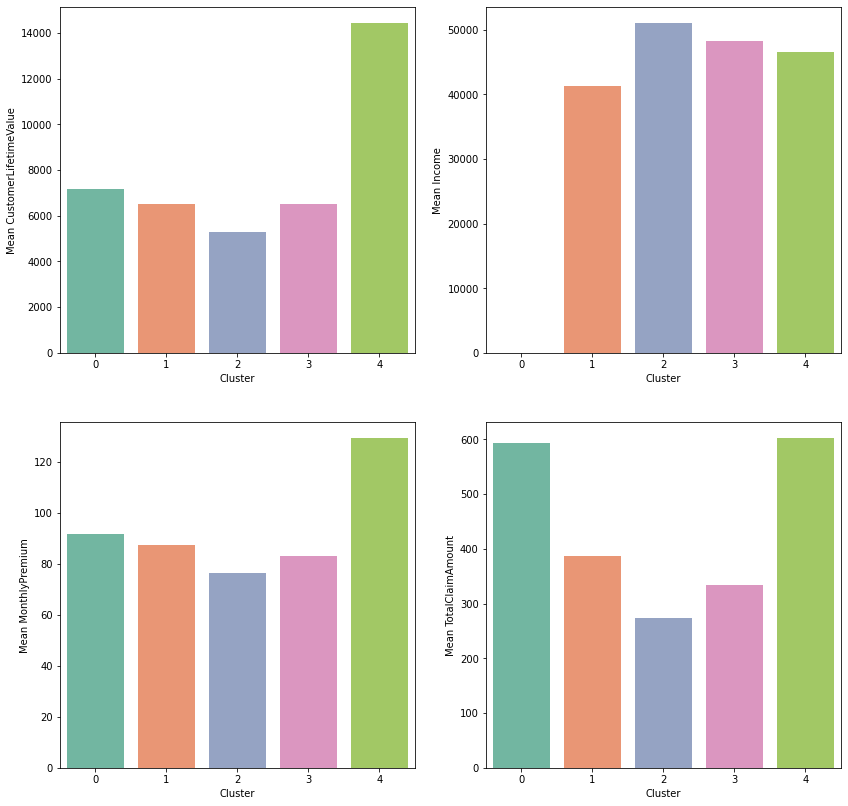

In [195]:
# Barplots for our input variables by cluster
num_cols = ['CustomerLifetimeValue','Income','MonthlyPremium','TotalClaimAmount']

fig, ax = plt.subplots(2,2,figsize=(14,14))
for i,col in enumerate(num_cols):
    r,c = i//2,i%2
    bar_df = df_proto[['Cluster',col]].groupby(['Cluster'],as_index=False).mean()
    sns.barplot(x='Cluster', y=col, data=bar_df, ax=ax[r,c], palette='Set2')
    ax[r,c].set_ylabel('Mean ' + col)

We see some preliminary trends in our data: It seems like KPrototypes clustered higher `CLV` customers (with higher `MonthlyPremiums`) into Cluster 4, unemployed customers (`MeanIncome` = 0) in Cluster 0, and people with high Total Claims in Clusters 0 and 4. 

<a id='section8'></a>

# 8. Conclusion

In this project, we analyzed customer data from an auto insurance company. Using several different models, metrics, and techniques, we were successfully able to predict Customer Lifetime Value and Response to Marketing Calls, and we ran interesting, applicable customer segmentation using non-standard variables. 

Going forward, the (hypothetical) Insurance Marketing team could now turn towards sending group-specific email campaigns, adjust rates and promotions sent to existing customers, ads that target specific segments of new customers, and so much more!